In [8]:
# study of mlp learning curves given different number of nodes for multi-class classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
 

# Challenge of Training Deep Learning
https://machinelearningmastery.com/a-gentle-introduction-to-the-challenge-of-training-deep-learning-neural-network-models/





- **Neural Nets Learn a Mapping Function**: 
    - A true mapping function exists to best map input variables to output variables and that a neural network model can do a reasonable job at approximating the true unknown underlying mapping function
    - We can describe the broader problem that neural networks solve as “function approximation.” They learn to approximate an unknown underlying mapping function given a training dataset. They do this by learning weights and the model parameters, given a specific network structure that we design.

- **Learning Network Weights Is Hard**:
    - Finding parameters for many machine learning algorithms involves solving a convex optimization problem: that is an error surface that is shaped like a bowl with a single best solution. *This is not the case for deep learning neural networks.*
    - It is not a simple bowl shape with a single best set of weights that we are guaranteed to find. Instead, there is a landscape of peaks and valleys with many good and many misleadingly good sets of parameters that we may discover.

- **Navigating the Non-Convex Error Surface**: 
    - Neural network models can be thought to learn by navigating a non-convex error surface.
    - Backpropagation refers to a technique from calculus to calculate the derivative (e.g. the slope or the gradient) of the model error for specific model parameters, allowing model weights to be updated to move down the gradient.
    - Stochastic gradient descent can be used to find the parameters for other machine learning algorithms, such as linear regression, and it is used when working with very large datasets, although if there are sufficient resources, then convex-based optimization algorithms are significantly more efficient.
- **Components of the Learning Algorithm**:
    - Loss Function. The function used to estimate the performance of a model with a specific set of weights on examples from the training dataset.
    - Weight Initialization. The procedure by which the initial small random values are assigned to model weights at the beginning of the training process.
    - Batch Size. The number of examples used to estimate the error gradient before updating the model parameters.
    - Learning Rate: The amount that each model parameter is updated per cycle of the learning algorithm.
    - Epochs. The number of complete passes through the training dataset before the training process is terminated.

# Configure Capacity With Nodes and Layers
https://machinelearningmastery.com/how-to-control-neural-network-model-capacity-with-nodes-and-layers/

*Including including the number of nodes in a layer and the number
of layers used to define the scope of functions that can be learned by the model*

- Neural network model capacity is controlled both by the number of nodes and the number of layers in the model.
- A model with a single hidden layer and a sufficient number of nodes has the capability of learning any mapping function, but the chosen learning algorithm may or may not be able to realize this capability.
- Increasing the number of layers provides a short-cut to increasing the capacity of the model with fewer resources, and modern techniques allow learning algorithms to successfully train deep models.

## Change Model Capacity With Nodes

We can see that as the number of nodes is increased, the model is able to better decrease the loss, e.g. to better learn the training dataset. This plot shows the direct relationship between model capacity, as defined by the number of nodes in the hidden layer and the model’s ability to learn.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nodes=1: 0.138
nodes=2: 0.388
nodes=3: 0.756
nodes=4: 0.816
nodes=5: 0.944
nodes=6: 0.934
nodes=7: 0.950


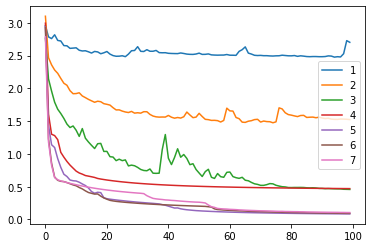

In [ ]:
# evaluate model and plot learning curve with given number of nodes
num_nodes = [1, 2, 3, 4, 5, 6, 7]
for n_nodes in num_nodes:
	# evaluate model with a given number of nodes
	history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
	# summarize final test set accuracy
	print('nodes=%d: %.3f' % (n_nodes, result))
	# plot learning curve
	pyplot.plot(history.history['loss'], label=str(n_nodes))
# show the plot
pyplot.legend()
pyplot.show()

## Change Model Capacity With Layers
- Increasing the number of layers can often greatly increase the capacity of the model, acting like a computational and learning shortcut to modeling a problem.
- The danger is that a model with more capacity than is required is likely to overfit the training data, and as with a model that has too many nodes, a model with too many layers will likely be unable to learn the training dataset, getting lost or stuck during the optimization process.

# Control the Stability With Batch Size
https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

*Including exploring whether variations such as batch, stochastic
(online), or minibatch gradient descent are more appropriate*

## Batch and an Epoch
https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

- **What Is a Sample?**: A sample is a single row of data. It contains inputs that are fed into the algorithm and an output that is used to compare to the prediction and calculate an error.
- **What Is a Batch?**: The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
    - Batch Gradient Descent. Batch Size = Size of Training Set
    - Stochastic Gradient Descent. Batch Size = 1
    - Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training Set

- **What Is a Epoch?**: The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
- **What Is the Difference Between Batch and Epoch?**: 
    - The batch size is a number of samples processed before the model is updated.
    - The number of epochs is the number of complete passes through the training dataset.

- Batch Gradient Descent: We can see that the model is relatively slow to learn this problem, converging on a solution after about 100 epochs after which changes in model performance are minor.
- Stochastic Gradient Descent: The plot shows the unstable nature of the training process with the chosen configuration. The poor performance and violent changes to the model suggest that the learning rate used to update weights after each training example may be too large and that a smaller learning rate may make the learning process more stable.
- Minibatch Gradient Descent: The line plot shows the dynamics of both stochastic and batch gradient descent. Specifically, the model learns fast and has noisy updates but also stabilizes more towards the end of the run, more so than stochastic gradient descent.

The plots show that small batch results generally in rapid learning but a volatile learning process with higher variance in the classification accuracy. Larger batch sizes slow down the learning process but the final stages result in a convergence to a more stable model exemplified by lower variance in classification accuracy.


# Configure What to Optimize With Loss Functions
https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/


## Loss and Loss Functions
https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/

*Including understanding the way different loss functions
must be interpreted and whether an alternate loss function would be appropriate for your
problem*

## Regression Loss Functions


### Mean Squared Error Loss

## Binary Classification Loss Functions

### Binary Cross-Entropy Loss

## Multi-Class Classification Loss Functions

### Multi-Class Cross-Entropy Loss

### Sparse Multiclass Cross-Entropy Loss

### Kullback Leibler Divergence Loss

# Configure Speed of Learning With Learning Rate
https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/


## Understand the Impact of Learning Rate
https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

*Including understanding the effect of different learning rates
on your problem and whether modern adaptive learning rate methods such as Adam would
be appropriate*

## Learning Rate Dynamics

The plots show oscillations in behavior for the too-large learning rate of 1.0 and the inability of the model to learn anything with the too-small learning rates of 1E-6 and 1E-7.

We can see that the model was able to learn the problem well with the learning rates 1E-1, 1E-2 and 1E-3, although successively slower as the learning rate was decreased. With the chosen model configuration, the results suggest a moderate learning rate of 0.1 results in good model performance on the train and test sets.

## Momentum Dynamics
Momentum can smooth the progression of the learning algorithm that, in turn, can accelerate the training process.

We can see that the addition of momentum does accelerate the training of the model. Specifically, momentum values of 0.9 and 0.99 achieve reasonable train and test accuracy within about 50 training epochs as opposed to 200 training epochs when momentum is not used.

In all cases where momentum is used, the accuracy of the model on the holdout test dataset appears to be more stable, showing less volatility over the training epochs.

## Learning Rate Decay
https://medium.com/analytics-vidhya/learning-rate-decay-and-methods-in-deep-learning-2cee564f910b

Learning rate decay is a technique for training modern neural networks. It starts training the network with a large learning rate and then slowly reducing/decaying it until local minima is obtained. It is empirically observed to help both optimization and generalization.

We can see that the large decay values of 1E-1 and 1E-2 indeed decay the learning rate too rapidly for this model on this problem and result in poor performance. The smaller decay values do result in better performance, with the value of 1E-4 perhaps causing in a similar result as not using decay at all. 

## Drop Learning Rate on Plateau

The ReduceLROnPlateau will drop the learning rate by a factor after no change in a monitored metric for a given number of epochs.

The patience in the ReduceLROnPlateau controls how often the learning rate will be dropped.

## Adaptive Learning Rates

Keras provides a number of different popular variations of stochastic gradient descent with adaptive learning rates, such as:

- Adaptive Gradient Algorithm (AdaGrad).
- Root Mean Square Propagation (RMSprop).
- Adaptive Moment Estimation (Adam).

# Stabilize Learning With Data Scaling
https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

*Including the sensitivity that small network weights have to
the scale of input variables and the impact of large errors in the target variable have on
weight updates*

# Fix Vanishing Gradients With ReLU
https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/

*Prevent the training of deep multiple-layered networks causing
layers close to the input layer to not have their weights updated; that can be addressed using
modern activation functions such as the rectified linear activation function*

## Introduction to the Rectified Linear Unit (ReLU)
https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

# Fix Exploding Gradients With Gradient Clipping
https://machinelearningmastery.com/how-to-avoid-exploding-gradients-in-neural-networks-with-gradient-clipping/

*Large weight updates cause a numerical overflow or underflow
making the network weights take on a NaN or Inf value; that can be addressed using
gradient scaling or gradient clipping*

# Accelerate Learning With Batch Normalization
https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/

## Introduction to Batch Normalization
https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/

# Deeper Models With Greedy Layer-Wise Pretraining
https://machinelearningmastery.com/greedy-layer-wise-pretraining-tutorial/

*Where layers are added one at a time to a model,
learning to interpret the output of prior layers and permitting the development of much
deeper models: a milestone technique in the field of deep learning*

# Jump-Start Training With Transfer Learning
https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/

*Where a model is trained on a different, but somehow related,
predictive modeling problem and then used to seed the weights or used wholesale as a
feature extraction model to provide input to a model trained on the problem of interest*

# Adam Optimization Algorithm
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/